# Heart Disease UCI Data Preprocessing -Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, Random Forest
Raw dataset was downloaded from Kaggle. The target is to build a machine learnign model to predict whether there is a chance of heart attack based on the different parameters. In this document I will use the mostly common classification algorithms to learn the preprocessed dataset, including logistic regression, K-Neareast Neighbors, Support Vector Machines, Naive Bayes, Decision Tress and Random Forest. I would like to just split the data into traning set and test set, without further spliting the training data set into training set and validation set. The main purpose is to quickly check the accuracy of the fitting of these models without tuning the hyperparameters in these models.
## 1. Load the data
For the first step, I would like to load the preprocessed, delete the first index column which does not contain meaningful inputs, define the inputs and targets. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the preprocessed data
data_preprocessed = pd.read_csv("heart_preprocessed.csv")
# Delete the first column
data_preprocessed = data_preprocessed.drop(["Unnamed: 0"], axis = 1)
# Review the head of the data frame 
data_preprocessed.head()

,age,sex,cp_1,cp_2,cp_3,trestbps,chol,fbs,restecg_1,restecg_2,thalach,exang,oldpeak,slope_1,slope_2,ca,thal_1,thal_2,thal_3,target
0,63,1,0,0,1,145,233,1,0,0,150,0,2.3,0,0,0,1,0,0,1
1,37,1,0,1,0,130,250,0,1,0,187,0,3.5,0,0,0,0,1,0,1
2,41,0,1,0,0,130,204,0,0,0,172,0,1.4,0,1,0,0,1,0,1
3,56,1,1,0,0,120,236,0,1,0,178,0,0.8,0,1,0,0,1,0,1
4,57,0,0,0,0,120,354,0,1,0,163,1,0.6,0,1,0,0,1,0,1


In [3]:
# Define the inputs in the data frame: all the columns except the last one
unscaled_input = data_preprocessed.iloc[:, :-1]
# Review the head of the input
unscaled_input.head()

,age,sex,cp_1,cp_2,cp_3,trestbps,chol,fbs,restecg_1,restecg_2,thalach,exang,oldpeak,slope_1,slope_2,ca,thal_1,thal_2,thal_3
0,63,1,0,0,1,145,233,1,0,0,150,0,2.3,0,0,0,1,0,0
1,37,1,0,1,0,130,250,0,1,0,187,0,3.5,0,0,0,0,1,0
2,41,0,1,0,0,130,204,0,0,0,172,0,1.4,0,1,0,0,1,0
3,56,1,1,0,0,120,236,0,1,0,178,0,0.8,0,1,0,0,1,0
4,57,0,0,0,0,120,354,0,1,0,163,1,0.6,0,1,0,0,1,0


In [4]:
# Define the targtets of the data frame: the last column
target = data_preprocessed.iloc[:, -1]
# Review the head of the targets
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 2. Standardize the data
In this part, I would like to standardize the numerical data to achieve good fitting. The categorical data columns will not be standardized as they have relatively similar range as standardized data and it is easier to explain the coefficients and odds ratios of them at a later time (difference based on per unit change of the dummy parameter). 

In [5]:
# The part uses Udemy Data Science class as a reference
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

class CustomScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns, copy = True, with_mean = True, with_std = True):
        self.scaler = StandardScaler(copy, with_mean, with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y = None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y = None, copy = None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns = self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis = 1)[init_col_order]

In [6]:
# Check the column names of the inputs
unscaled_input.columns.values

array(['age', 'sex', 'cp_1', 'cp_2', 'cp_3', 'trestbps', 'chol', 'fbs',
       'restecg_1', 'restecg_2', 'thalach', 'exang', 'oldpeak', 'slope_1',
       'slope_2', 'ca', 'thal_1', 'thal_2', 'thal_3'], dtype=object)

In [7]:
# Only choose the numerical parameters to standardize as it is easier to explain the meaning of coefficients for the categorical data at a later time 
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [8]:
# Define the scaler and apply to the unscaled data
heart_scaler = CustomScaler(columns_to_scale)
heart_scaler.fit(unscaled_input)
scaled_input = heart_scaler.transform(unscaled_input)

In [9]:
# Check the head of the scaled inputs
scaled_input.head()

,age,sex,cp_1,cp_2,cp_3,trestbps,chol,fbs,restecg_1,restecg_2,thalach,exang,oldpeak,slope_1,slope_2,ca,thal_1,thal_2,thal_3
0,0.952197,1,0,0,1,0.763956,-0.256334,1,0,0,0.015443,0,1.087338,0,0,-0.714429,1,0,0
1,-1.915313,1,0,1,0,-0.092738,0.072199,0,1,0,1.633471,0,2.122573,0,0,-0.714429,0,1,0
2,-1.474158,0,1,0,0,-0.092738,-0.816773,0,0,0,0.977514,0,0.310912,0,1,-0.714429,0,1,0
3,0.180175,1,1,0,0,-0.663867,-0.198357,0,1,0,1.239897,0,-0.206705,0,1,-0.714429,0,1,0
4,0.290464,0,0,0,0,-0.663867,2.082050,0,1,0,0.583939,1,-0.379244,0,1,-0.714429,0,1,0


## 3. Split the data into train (with validation), test sets
Since logistic regression does not really have critical hyperparameters to tune, I would simply split the dataset into two, one is train_validation, the other is test. 

In [10]:
from sklearn.model_selection import train_test_split
x_train_val, x_test, y_train_val, y_test = train_test_split(scaled_input, target, train_size = 0.8, random_state = 20)
print(x_train_val.shape, x_test.shape, y_train_val.shape, y_test.shape)

(242, 19) (61, 19) (242,) (61,)


At this point, I would like to split the train(with validation) data set and save the three data sets to prepare for using neural network (in a different document). To compare with the logistic regression, I would split the data into train, validation, test sets in two steps. Therefore, I will have the same test set to check the final accuracy based on tuning the model using the same train (with validation) set. With this two step split, I have got 60% train data, 20% validation data, 20% test data.

In [11]:
# Split the train validation data set again into train set and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, train_size = 0.75, random_state = 20)
# Double check the shape of resulting sets
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

#Export the data sets
np.savez('Heart_data_train', inputs = x_train, targets = y_train)
np.savez('Heart_data_validation', inputs= x_val, targets= y_val)
np.savez('Heart_data_test', inputs = x_test, targets = y_test)

(181, 19) (61, 19) (61, 19) (181,) (61,) (61,)


## 4. Build and Evaluate the Models
### 4.1 Logistic Regression
#### 4.1.1 Fitting with logistic regression
In this part, I would use logistic regression to fit the data, with the accuracy checked for the train set (with validation set). As seen in result, the accuracy for the training set is about 0.88.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
# fit the train set and get the accuracy of the regression on training set
reg = LogisticRegression()
reg.fit(x_train_val, y_train_val)
print("Accuracy for training:", reg.score(x_train_val, y_train_val))

Accuracy for training: 0.8842975206611571


C:\Users\jiang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 4.1.2 Summary of coefficient and intercept
In this part, the fitting results are presented in the summary table, including coefficients and odds ratios. As shown in the results,the chest pain types have the most significant influence on the result.
In fact, there are some parameters shown very minor effects. It can be understood that some of these parameters have correlations among them and it wil be better to select some parameters for building the model. However, this needs further research background, so I would not pursue "eliminating" the parameters here.

In [14]:
# Get the intercept of the regression
reg.intercept_

array([0.01230124])

In [15]:
# Get the coefficients of the regression
reg.coef_

array([[ 0.09740815, -0.73296051,  0.42034781,  1.32874232,  1.14469194,
        -0.45344277, -0.05609931,  0.32080925,  0.67479553,  0.06144268,
         0.55475002, -1.27073669, -0.4262272 , -0.46195054, -0.00299999,
        -0.75569579,  0.02609394,  0.87880869, -0.72416526]])

In [16]:
# Get the name of all the features for summary table
features = unscaled_input.columns.values
summary_table = pd.DataFrame(columns = ["Features"], data = features)
summary_table["Coefficients"] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ["Intercept", reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [17]:
# Calculate the odds ratio based on the coefficients,and show the summary table
summary_table["Odds ratio"] = np.exp(summary_table["Coefficients"])
summary_table.sort_values("Coefficients", ascending = False)

,Features,Coefficients,Odds ratio
4,cp_2,1.328742,3.776291
5,cp_3,1.144692,3.141473
18,thal_2,0.878809,2.408029
9,restecg_1,0.674796,1.963631
11,thalach,0.554750,1.741506
3,cp_1,0.420348,1.522491
8,fbs,0.320809,1.378243
1,age,0.097408,1.102310
10,restecg_2,0.061443,1.063370
17,thal_1,0.026094,1.026437


#### 4.1.3 Evaluate the model based on test set
As the final step, I would like to calculate accuracy, precision, recall and F2-score for this model based on the test set. The accuracy is about 0.75 as seen in the cell below.

In [18]:
print("Accuracy for test set:", reg.score(x_test, y_test))

Accuracy for test set: 0.7540983606557377


In [19]:
from sklearn.metrics import precision_recall_fscore_support
y_predict = reg.predict(x_test)
summary_more = precision_recall_fscore_support(y_test, y_predict, average = 'binary')
print("Precision:", summary_more[0])
print("Recall:", summary_more[1])
print("F2-score:", summary_more[2])

Precision: 0.8108108108108109
Recall: 0.7894736842105263
F2-score: 0.8


### 4.2  K-Nearest Neighbors Classification
#### 4.2.1 Build model using KNN
In this part, I would use K-nearest neighbor to fit the data, with the accuracy checked for the train set (with validation set). As seen in result, the accuracy for the training set is about 0.87.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train_val, y_train_val)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
#Check the train data set accuracy
print("Accuracy for training:", classifier.score(x_train_val, y_train_val))

Accuracy for training: 0.871900826446281


#### 4.2.2 Evaluate the model based on test set
As the final step, I would like to calculate accuracy, precision, recall and F2-score for this model based on the test set. The accuracy is about 0.80 as seen in the cell below, which is better than the one obtained by logistic regression.

In [22]:
# define a function eval_test_set, which can be used in the following sections about other classification methods.
def eval_test_set():
    print("Accuracy for test set:", classifier.score(x_test, y_test))
    y_predict = classifier.predict(x_test)
    summary_more = precision_recall_fscore_support(y_test, y_predict, average = 'binary')
    print("Precision:", summary_more[0])
    print("Recall:", summary_more[1])
    print("F2-score:", summary_more[2])

# Run function eval_test_set()
eval_test_set()

Accuracy for test set: 0.8032786885245902
Precision: 0.8421052631578947
Recall: 0.8421052631578947
F2-score: 0.8421052631578947


### 4.3  Support Vector Machine (SVM)
#### 4.3.1 Build model using SVM
In this part, I would use SVM to fit the data, with the accuracy checked for the train set (with validation set). Here I would like to use radial basis function (RBF) as the kernel. As seen in result, the accuracy for the training set is about 0.89.

In [23]:
from sklearn.svm import SVC
classifier = SVC(C = 1, kernel = 'rbf')
classifier.fit(x_train_val, y_train_val)

C:\Users\jiang\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
#Check the train data set accuracy
print("Accuracy for training:", classifier.score(x_train_val, y_train_val))

Accuracy for training: 0.8966942148760331


#### 4.3.2 Evaluate the model based on test set
As the final step, I would like to calculate accuracy, precision, recall and F2-score for this model based on the test set. The accuracy is about 0.79 as seen in the cell below, which is better than the one obtained by logistic regression, but not good as KNN.

In [25]:
# Evaluate the model using the test set
eval_test_set()

Accuracy for test set: 0.7868852459016393
Precision: 0.8571428571428571
Recall: 0.7894736842105263
F2-score: 0.8219178082191781


### 4.4  Naive Bayes
#### 4.4.1 Build model using Naive Bayes
In this part, I would use Naive Bayes algorithm  to fit the data, with the accuracy checked for the train set (with validation set). Here I would like to use Gaussian Naive Bayes even some of the attributes are categorical parameters. As seen in result, the accuracy for the training set is about 0.86.

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train_val, y_train_val)

#Check the train data set accuracy
print("Accuracy for training:", classifier.score(x_train_val, y_train_val))

Accuracy for training: 0.859504132231405


#### 4.4.2 Evaluate the model based on test set
As the final step, I would like to calculate accuracy, precision, recall and F2-score for this model based on the test set. The accuracy is about 0.77 as seen in the cell below, which is better than the one obtained by logistic regression, but not good as KNN and SVM.

In [27]:
# Evaluate the model using the test set
eval_test_set()

Accuracy for test set: 0.7704918032786885
Precision: 0.8333333333333334
Recall: 0.7894736842105263
F2-score: 0.8108108108108109


### 4.5 Decision Tree
#### 4.5.1 Build model using Decision Tree
In this part, I would use decision tree algorithm  to fit the data, with the accuracy checked for the train set (with validation set). As seen in result, the accuracy for the training set is 1. This is an obvious result due to the nature of decision tree and default value in this argument of this classifier.

Accuracy for training: 1.0


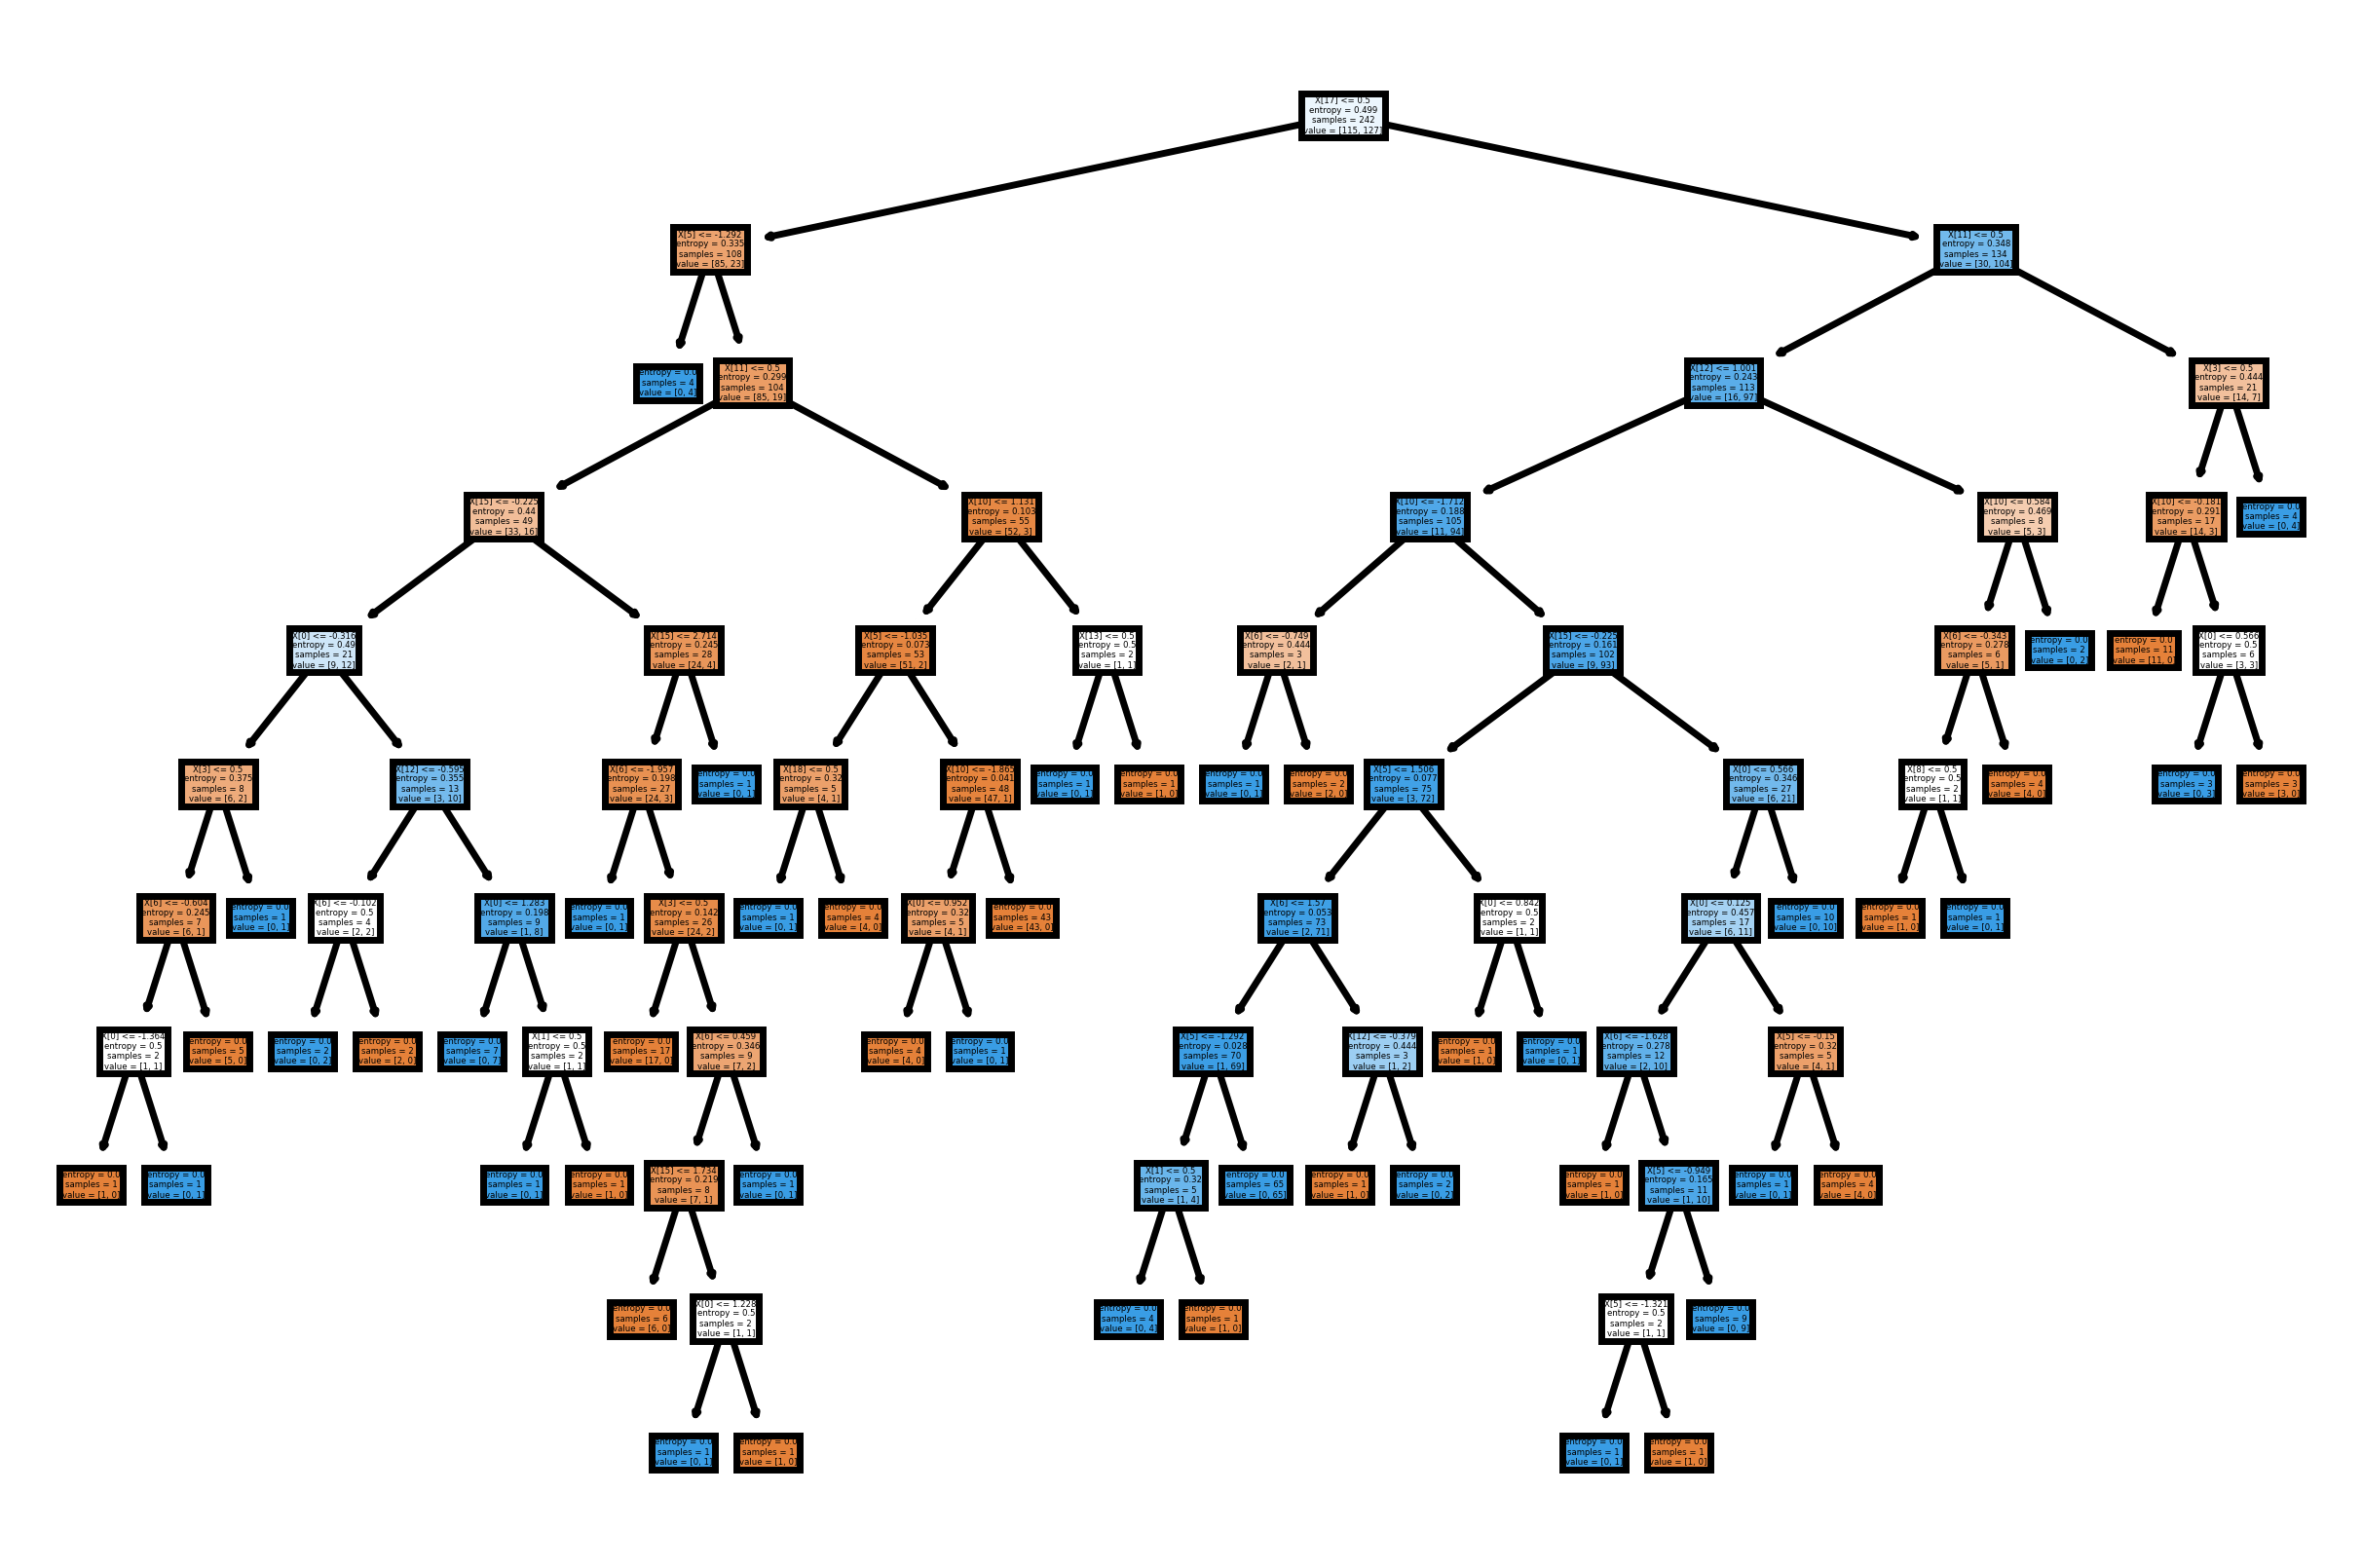

In [28]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(random_state=20)
classifier.fit(x_train_val, y_train_val)

#Check the train data set accuracy
print("Accuracy for training:", classifier.score(x_train_val, y_train_val))

from sklearn import tree

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 500

plt.figure()
tree.plot_tree(classifier, filled=True)
plt.show()

#### 4.5.2 Evaluate the model based on test set
As the final step, I would like to calculate accuracy, precision, recall and F2-score for this model based on the test set. The accuracy is about 0.77 as seen in the cell below, which is same as Naive Bayes. The reason of much better accuracy on the trainning set than on the test set is overfitting due to the nature of decision tree as the split is done until the end using the default argument values of min_samples_split and min_samples_leaf.

In [29]:
# Evaluate the model using the test set
eval_test_set()

Accuracy for test set: 0.7704918032786885
Precision: 0.875
Recall: 0.7368421052631579
F2-score: 0.7999999999999999


### 4.6 Random Forest
#### 4.6.1 Build model using Random Forest
In this part, I would use Random Forest algorithm  to build the model, with the accuracy checked for the train set (with validation set). Since the dataset is small, to avoid overfitting, I would like to change the parameter max_depth to 1. As seen in result, the accuracy for the training set is 0.83.

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=1, random_state=0)
classifier.fit(x_train_val, y_train_val)

#Check the train data set accuracy
print("Accuracy for training:", classifier.score(x_train_val, y_train_val))

Accuracy for training: 0.8305785123966942


C:\Users\jiang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### 4.5.2 Evaluate the model based on test set
As the final step, I would like to calculate accuracy, precision, recall and F2-score for this model based on the test set. The accuracy is about 0.80 as seen in the cell below, which is as good as KNN.

In [31]:
# Evaluate the model using the test set
eval_test_set()

Accuracy for test set: 0.8032786885245902
Precision: 0.8421052631578947
Recall: 0.8421052631578947
F2-score: 0.8421052631578947
